In [208]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import urllib
%matplotlib inline

In [209]:
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/testing/covid-testing.xlsx?raw=true'
urllib.request.urlretrieve(url, 'covid-testing.xlsx')
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/ecdc/full_data.csv?raw=true'
urllib.request.urlretrieve(url, 'full_data.csv')

('full_data.csv', <http.client.HTTPMessage at 0x1c60d780>)

In [210]:
df_cases = pd.read_csv('full_data.csv')
df_cases = df_cases.groupby('location', sort=False,as_index='True')['location','total_cases','total_deaths'].max()

In [211]:
df_cases = df_cases[df_cases['location'] != 'World']
#df = df.rename(columns={'Cumulative total tests':'Cumulative_total_tests','Total confirmed cases of COVID-19 (cases)':'total_covid19_confirmed_cases'})
#df = df[df['Code'] != 0]
df_cases = df_cases.rename(columns={'location':'Entity'})

In [221]:
df = pd.read_excel("covid-testing.xlsx","Latest data and source details")
df = df.fillna(0)
for i, row in df.iterrows():
    df.loc[i,"Entity"] = df.loc[i,"Entity"].split(' -')[0]
#Add the testing data from previous dataframe here
df = df.merge(df_cases)
df = df.drop_duplicates(subset='Entity', keep="first")
df[df['Entity'] == 'India']

,Entity,Date,Source URL,Source label,Notes,Cumulative total,Daily change in cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,General source label,General source URL,Short description,Detailed description,total_cases,total_deaths
57,United States,2020-04-13,https://covidtracking.com/api/us/daily.csv,COVID Tracking Project,0,2935006,129114.0,8.856,0.39,COVID Tracking Project,http://covidtracking.com/,The data are an aggregation of figures release...,This is a collaborative project launched in or...,609516,26057


In [213]:
x_axis = 'total_cases'
y_axis = 'Cumulative total'

In [214]:
#df = df[df['total_covid19_confirmed_cases'] < 50000]
#df = df[df['total_covid19_confirmed_cases'] > 10]
#df = df[df['Cumulative_total_tests'] < 1000000]
#df = df[df['Cumulative_total_tests'] > 5000]
df = df.sort_values(by=x_axis,ascending=False)

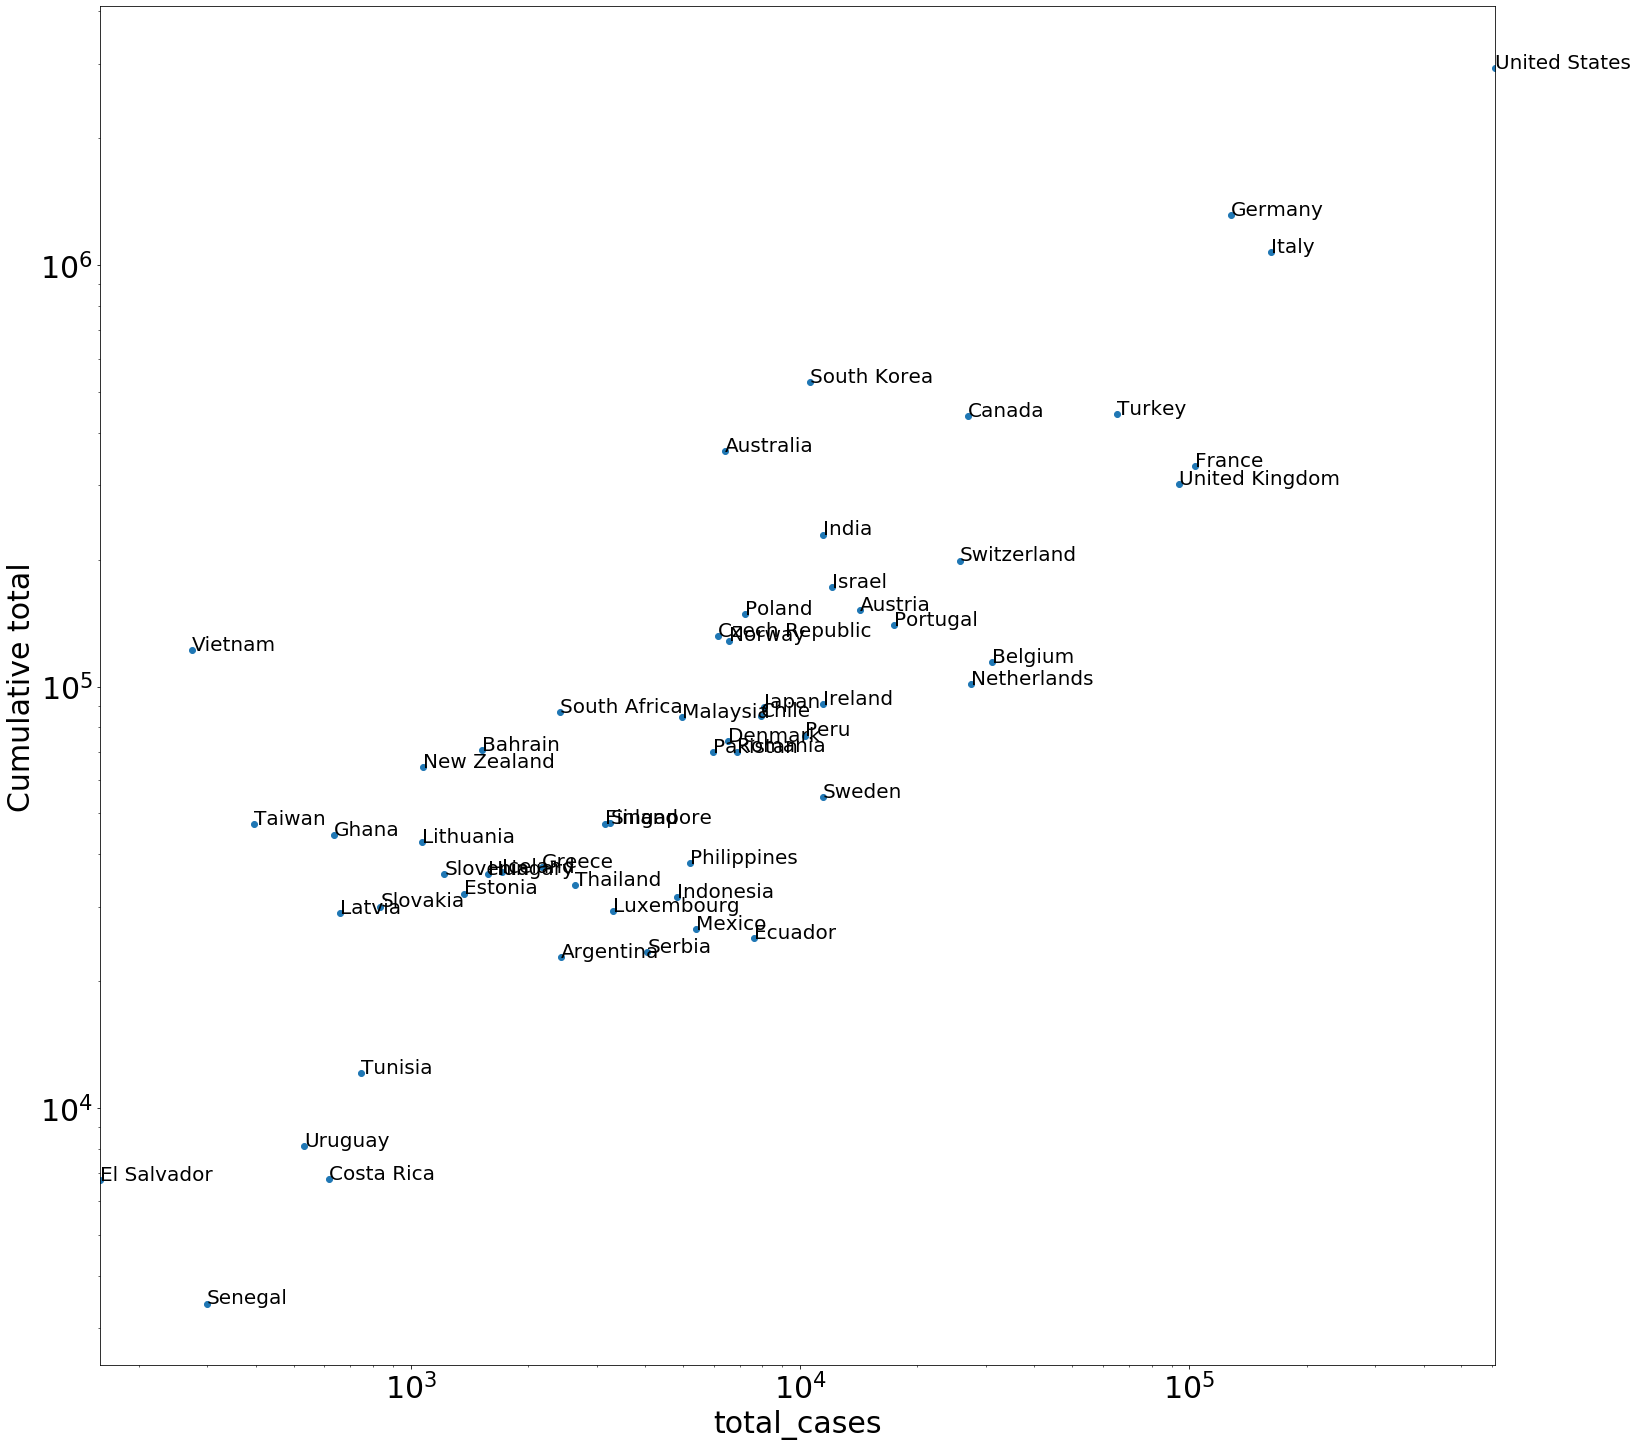

In [215]:
def label_point(x, y, val, ax,x_axis,y_axis,bb=False):
    a = pd.concat({x_axis: x, y_axis: y, 'Entity': val}, axis=1)
    for i, point in a.iterrows():
        if bb:
            ax.text(point[x_axis], point[y_axis],str(point['Entity']),fontsize=20, bbox=dict(facecolor='green', alpha=0.6))
        else:
            ax.text(point[x_axis], point[y_axis],str(point['Entity']),fontsize=20)
        
def draw_graph(df,x_axis,y_axis,bbox=False,fig_size=(25,25),scale='log'):
    ax = df.set_index(x_axis)[y_axis].plot(style='o',
                                           figsize=fig_size,
                                          #yticks=[100,1000,10000,100000,1000000],
                                          #xticks=[1000,10000,100000,1000000]
                                             )
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_yscale(scale)
    ax.set_xscale(scale)
    label_point(getattr(df,x_axis), getattr(df,y_axis), df.Entity, ax, x_axis,y_axis,bbox)
    return ax
    #plt.loglog(Y,X,color='red')
    #plt.savefig('covid.png')
    
draw_graph(df,x_axis,y_axis)

In [216]:
X_train = np.array(df[x_axis].tolist())
Y_train = np.array(df[y_axis].tolist())
X_train = np.reshape(X_train,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))
print(X_train.shape,Y_train.shape)

(57, 1) (57, 1)


In [217]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
Y_train_pred = reg.predict(X_train)

In [218]:
reg.intercept_
X_test = np.array([[0],[53000],[10000],[5000000]])
Y_pred = reg.predict(X_test)
print(Y_pred)

[[   63962.98764934]
 [  324582.85919713]
 [  113136.54831874]
 [24650743.32234663]]


In [219]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=4, random_state=0)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print(Y_pred)

[  65714.59133017  320077.16833333  285344.67210317 2587162.4       ]


C:\Users\h245248\AppData\Local\Continuum\anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\h245248\AppData\Local\Continuum\anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


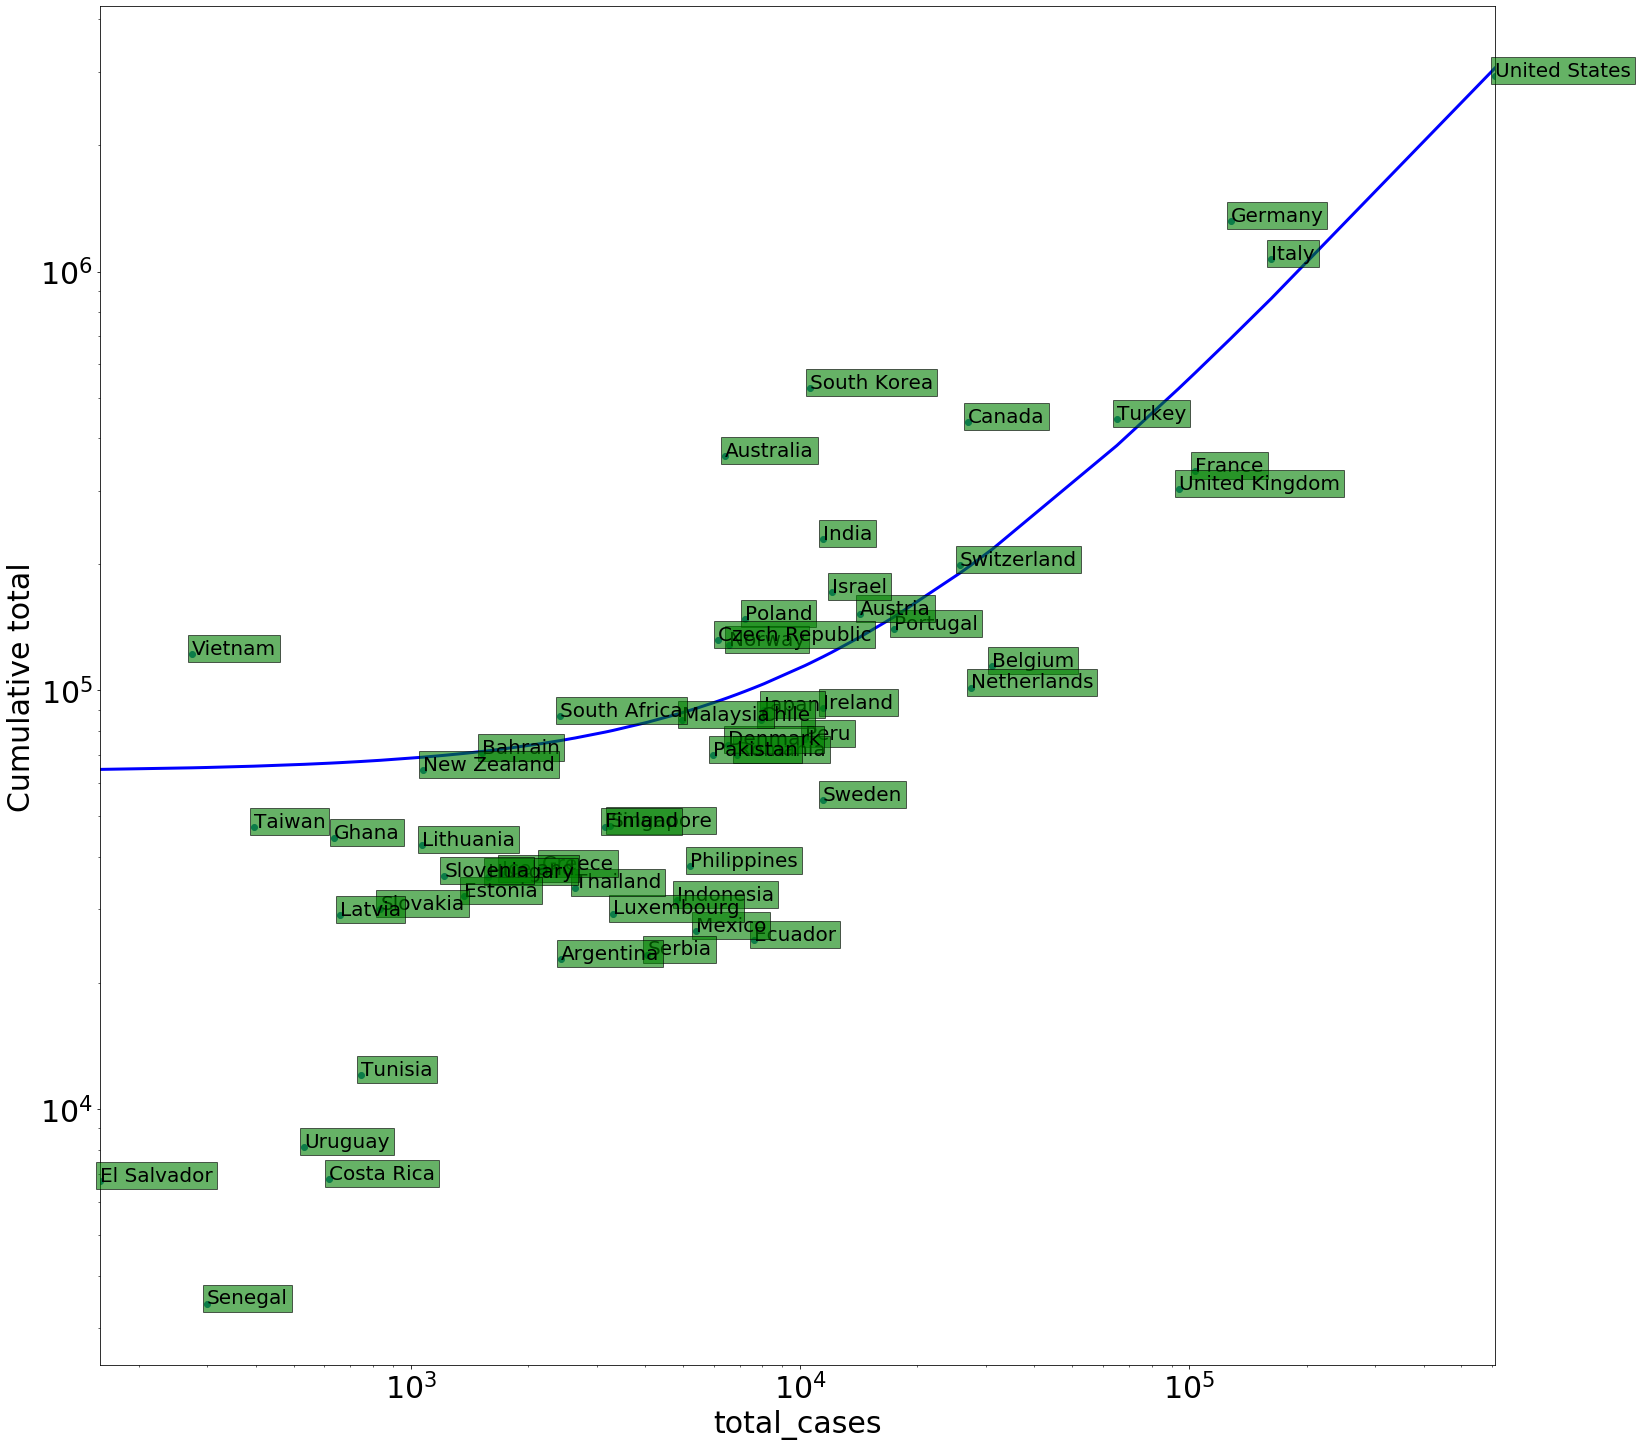

In [220]:
#df = df[:20]
#df = df.sample(20)
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=35)  # fontsize of the figure title

ax = draw_graph(df,x_axis,y_axis,True,scale='log')
plt.plot(X_train,Y_train_pred,color='blue',linewidth=3)
plt.savefig('covid.png')